In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Q-Learning AGENT class

In [2]:
class QLearningAgent:
    def __init__(self, num_actions, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0, exploration_decay=0.99):
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.q_table = np.zeros((25, num_actions))

    def choose_action(self, state, policy):
        if policy == 'PRANDOM':
            return self.choose_action_prandom(state)
        elif policy == 'PEXPLOIT':
            return self.choose_action_pexploit(state)
        elif policy == 'PGREEDY':
            return self.choose_action_pgreedy(state)

    def choose_action_prandom(self, state):
        if np.random.rand() < self.exploration_rate:
            return np.random.randint(self.num_actions)
        else:
            return np.argmax(self.q_table[state])

    def choose_action_pexploit(self, state):
        if np.random.rand() < self.exploration_rate:
            if np.random.rand() < 0.8:
                return np.argmax(self.q_table[state])
            else:
                return np.random.choice(np.where(self.q_table[state] == np.max(self.q_table[state]))[0])
        else:
            return np.argmax(self.q_table[state])

    def choose_action_pgreedy(self, state):
        return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        old_q_value = self.q_table[state, action]
        max_next_q_value = np.max(self.q_table[next_state])
        new_q_value = old_q_value + self.learning_rate * (reward + self.discount_factor * max_next_q_value - old_q_value)
        self.q_table[state, action] = new_q_value

    def decay_exploration_rate(self):
        self.exploration_rate *= self.exploration_decay


### World class

In [3]:
class Environment:
    def __init__(self):
        self.grid_size = 5
        self.num_agents = 3
        self.pickup_locations = [(1, 5), (2, 4), (5, 2)]  
        self.dropoff_locations = [(1, 1), (3, 1), (4, 5)] 
        self.agent_locations = [(3, 3), (5, 3), (1, 3)]
        self.agent_colors = ['red', 'blue', 'black']
        self.agent_blocks = [0, 0, 0]
        self.blocks_at_pickup = [5, 5, 5]
        self.max_blocks_at_dropoff = 5

    def reset(self):
        self.agent_locations = [(3, 3), (5, 3), (1, 3)]
        self.agent_blocks = [0, 0, 0]
        self.blocks_at_pickup = [5, 5, 5]

    def get_state(self, agent_id):
        agent_loc = self.agent_locations[agent_id]
        return (agent_loc[0] - 1) * (self.grid_size - 1) + (agent_loc[1] - 1)  

    def move_agent(self, agent_id, action):
        current_loc = self.agent_locations[agent_id]
        new_loc = current_loc

        if action == 0:  # Up
            new_loc = (max(current_loc[0] - 1, 1), current_loc[1])
        elif action == 1:  # Down
            new_loc = (min(current_loc[0] + 1, self.grid_size), current_loc[1])
        elif action == 2:  # Left
            new_loc = (current_loc[0], max(current_loc[1] - 1, 1))
        elif action == 3:  # Right
            new_loc = (current_loc[0], min(current_loc[1] + 1, self.grid_size))

        self.agent_locations[agent_id] = new_loc

        reward = -1
        if new_loc in self.pickup_locations:
            pickup_index = self.pickup_locations.index(new_loc)
            if self.blocks_at_pickup[pickup_index] > 0 and self.agent_blocks[agent_id] == 0:
                reward += 13
                self.blocks_at_pickup[pickup_index] -= 1
                self.agent_blocks[agent_id] += 1
        elif new_loc in self.dropoff_locations:
            dropoff_index = self.dropoff_locations.index(new_loc)
            if self.agent_blocks[agent_id] > 0 and self.agent_blocks[agent_id] < self.max_blocks_at_dropoff:
                reward += 13
                self.agent_blocks[agent_id] -= 1

        return reward

### Execution and Display functions

In [4]:
def train_agents(env, agents, num_iterations, policy):
    for iteration in range(num_iterations):
        env.reset()
        for agent_id in range(env.num_agents):
            agent = agents[agent_id]
            state = env.get_state(agent_id)
            total_reward = 0

            for _ in range(100):  
                action = agent.choose_action(state, policy)  # Pass policy to choose_action
                reward = env.move_agent(agent_id, action)
                next_state = env.get_state(agent_id)
                total_reward += reward
                agent.update_q_table(state, action, reward, next_state)
                state = next_state
                if total_reward > 0:  
                    break

            agent.decay_exploration_rate()

        if iteration % 100 == 0:
            print("Iteration:", iteration)


def plot_environment(env):
    grid = np.zeros((env.grid_size, env.grid_size, 3))  
    for i in range(env.num_agents):
        x, y = env.agent_locations[i]
        grid[x-1, y-1] = np.array(plt.get_cmap('tab10')(i))[:3] 
    for x, y in env.pickup_locations:
        grid[x-1, y-1] = (0, 1, 0)  
    for x, y in env.dropoff_locations:
        grid[x-1, y-1] = (1, 0, 0)  

    plt.imshow(grid)
    plt.axis('off')
    plt.show()

### MAIN method

Experiment 1:
Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400
Iteration: 2500
Iteration: 2600
Iteration: 2700
Iteration: 2800
Iteration: 2900
Iteration: 3000
Iteration: 3100
Iteration: 3200
Iteration: 3300
Iteration: 3400
Iteration: 3500
Iteration: 3600
Iteration: 3700
Iteration: 3800
Iteration: 3900
Iteration: 4000
Iteration: 4100
Iteration: 4200
Iteration: 4300
Iteration: 4400
Iteration: 4500
Iteration: 4600
Iteration: 4700
Iteration: 4800
Iteration: 4900
Iteration: 5000
Iteration: 5100
Iteration: 5200
Iteration: 5300
Iteration: 5400
Iteration: 5500
Iteration: 5600
Iteration: 57

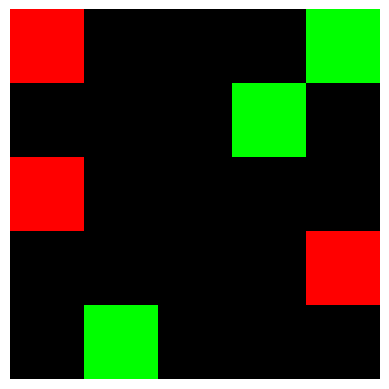

Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400
Iteration: 2500
Iteration: 2600
Iteration: 2700
Iteration: 2800
Iteration: 2900
Iteration: 3000
Iteration: 3100
Iteration: 3200
Iteration: 3300
Iteration: 3400
Iteration: 3500
Iteration: 3600
Iteration: 3700
Iteration: 3800
Iteration: 3900
Iteration: 4000
Iteration: 4100
Iteration: 4200
Iteration: 4300
Iteration: 4400
Iteration: 4500
Iteration: 4600
Iteration: 4700
Iteration: 4800
Iteration: 4900
Iteration: 5000
Iteration: 5100
Iteration: 5200
Iteration: 5300
Iteration: 5400
Iteration: 5500
Iteration: 5600
Iteration: 5700
Iteration: 5800
Iteration: 5900
Iteration: 6000
Iteration: 6100
Iteration: 6200
Iter

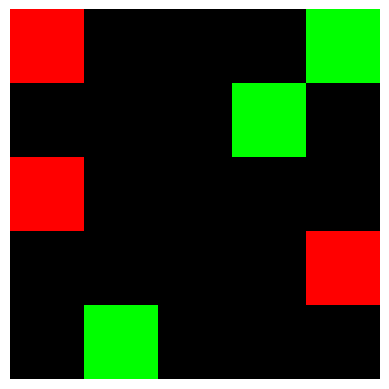

Iteration: 0
Iteration: 100
Iteration: 200
Iteration: 300
Iteration: 400
Iteration: 500
Iteration: 600
Iteration: 700
Iteration: 800
Iteration: 900
Iteration: 1000
Iteration: 1100
Iteration: 1200
Iteration: 1300
Iteration: 1400
Iteration: 1500
Iteration: 1600
Iteration: 1700
Iteration: 1800
Iteration: 1900
Iteration: 2000
Iteration: 2100
Iteration: 2200
Iteration: 2300
Iteration: 2400
Iteration: 2500
Iteration: 2600
Iteration: 2700
Iteration: 2800
Iteration: 2900
Iteration: 3000
Iteration: 3100
Iteration: 3200
Iteration: 3300
Iteration: 3400
Iteration: 3500
Iteration: 3600
Iteration: 3700
Iteration: 3800
Iteration: 3900
Iteration: 4000
Iteration: 4100
Iteration: 4200
Iteration: 4300
Iteration: 4400
Iteration: 4500
Iteration: 4600
Iteration: 4700
Iteration: 4800
Iteration: 4900
Iteration: 5000
Iteration: 5100
Iteration: 5200
Iteration: 5300
Iteration: 5400
Iteration: 5500
Iteration: 5600
Iteration: 5700
Iteration: 5800
Iteration: 5900
Iteration: 6000
Iteration: 6100
Iteration: 6200
Iter

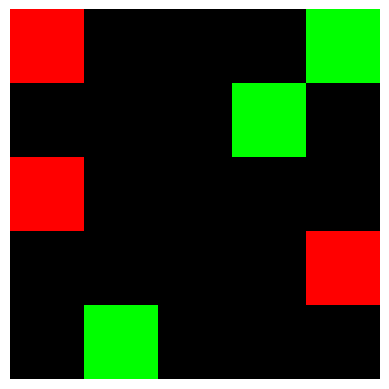

Q-table for PEXPLOIT policy:
Agent 0 Q-table:
[[-1.07567235e+00 -6.42548393e-01 -1.34308852e+00 -8.20139932e-01]
 [-5.37588943e-01  1.54406429e+00 -1.17419504e+00  1.76000430e-01]
 [ 7.16268629e-01  5.95124068e+00 -6.16863991e-01 -8.74946634e-02]
 [-4.16596486e-03  5.39951495e+00  1.74076957e-01  8.53016365e-01]
 [-5.81968106e-01 -3.42142982e-01 -5.47762284e-01  1.53945697e+00]
 [-4.33536260e-01  2.29577754e-01 -5.09881765e-01  5.99303462e+00]
 [ 1.86860848e+00  1.99791456e+00  1.96448468e+00  1.40021082e+01]
 [ 3.57157533e-01  2.12260610e+00  4.00421634e+00 -2.36547865e-01]
 [ 3.93194141e-02  1.96411858e-02 -3.01453039e-01 -1.02108048e-02]
 [ 1.36021761e+00  7.54837940e-01  2.04721175e-01  1.97649191e+00]
 [ 6.00105409e+00  1.92880915e-01 -3.77587910e-02  5.91167400e+00]
 [ 1.39796299e+01  2.04302153e-01  8.98494363e-01  9.26850961e-01]
 [ 5.57745069e-01  7.11250867e-01  5.43876768e-01  1.53083354e+00]
 [-3.02555544e-01  1.02966628e+01  7.47682977e-02  4.50677678e-01]
 [ 8.49344619e-0

In [5]:
if __name__ == "__main__":
    env = Environment()
    agents = [QLearningAgent(num_actions=4, learning_rate=0.3, discount_factor=0.5) for _ in range(env.num_agents)]
    
    # Experiment 1
    print("Experiment 1:")
    train_agents(env, agents, num_iterations=500, policy='PRANDOM')  # Initial training with PRANDOM for 500 steps

    # Switch policy to PRANDOM and continue training for 8500 steps
    train_agents(env, agents, num_iterations=8500, policy='PRANDOM')
    plot_environment(env)

    # Switch policy to PGREEDY and continue training for 8500 steps
    train_agents(env, agents, num_iterations=8500, policy='PGREEDY')
    plot_environment(env)

    # Switch policy to PEXPLOIT and continue training for 8500 steps
    train_agents(env, agents, num_iterations=8500, policy='PEXPLOIT')
    plot_environment(env)
    # After training for "PEXPLOIT" policy
    print("Q-table for PEXPLOIT policy:")
    for agent_id, agent in enumerate(agents):
        print(f"Agent {agent_id} Q-table:")
        print(agent.q_table)